In [0]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
%matplotlib inline
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

In [0]:
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [0]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [0]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

## Architecture 2 with 4 Convolution Layers 5x5 Kernal







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 1940s 32ms/step - loss: 0.1354 - acc: 0.9571 - val_loss: 0.0311 - val_acc: 0.9900
Epoch 2/12
60000/60000 [==============================] - 2019s 34ms/step - loss: 0.0363 - acc: 0.9886 - val_loss: 0.0251 - val_acc: 0.9917
Epoch 3/12
60000/60000 [==============================] - 2002s 33ms/step - loss: 0.0244 - acc: 0.9923 - val_loss: 0.0213 - val_acc: 0.9924
Epoch 4/12
60000/60000 [==============================] - 1941s 32ms/step - loss: 0.0191 - acc: 0.9940 - val_loss: 0.0234 - val_acc: 0.9917
Epoch 5/12
60000/60000 [==============================] - 1942s 32ms/step - loss: 0.0148 - acc: 0.9956 - val_loss: 0.0200 - val_acc: 0.9943
Epoch 6/12
60000/60000 [==============================] - 1920s 32ms/step - loss: 0.0129 - acc: 0.9957 - val_loss: 0.0370 - val_acc: 0.9879
Epoch 7/1

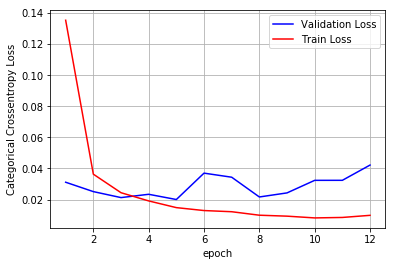

In [0]:
model = Sequential()
model.add(Conv2D(32, (5, 5), padding="same", activation="relu",input_shape=input_shape))
model.add(Conv2D(64, (5, 5), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (5, 5), padding="same", activation="relu"))
model.add(Conv2D(256, (5, 5), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## Architecture 2 with 4 Convolution Layers 5x5 Kernal + Dropouts + Batch Normalization in Dense Layer and after Convolution Layers








Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 2382s 40ms/step - loss: 0.1720 - acc: 0.9470 - val_loss: 0.0740 - val_acc: 0.9771
Epoch 2/12
60000/60000 [==============================] - 2402s 40ms/step - loss: 0.0554 - acc: 0.9832 - val_loss: 0.0389 - val_acc: 0.9868
Epoch 3/12
60000/60000 [==============================] - 2381s 40ms/step - loss: 0.0426 - acc: 0.9867 - val_loss: 0.0235 - val_acc: 0.9919
Epoch 4/12
60000/60000 [==============================] - 2370s 40ms/step - loss: 0.0361 - acc: 0.9886 - val_loss: 0.0233 - val_acc: 0.9928
Epoch 5/12
60000/60000 [==============================] - 2369s 39ms/step - loss: 0.0315 - acc: 0.9903 - val_loss: 0.0218 - val_acc: 0.9919
Epoch 6/12
60000/60000 [=========

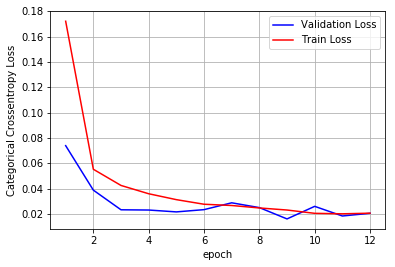

In [0]:
from keras.layers.normalization import BatchNormalization
model = Sequential()
model.add(Conv2D(32, (5, 5), padding="same", activation="relu",input_shape=input_shape))
model.add(Conv2D(64, (5, 5), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Conv2D(128, (5, 5), padding="same", activation="relu"))
model.add(Conv2D(256, (5, 5), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [0]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Architecture", "Kernals", "BatchNormalization", "Dropouts", "Loss", "Accuracy"]

x.add_row(["2 Convolution Layers","5x5","No","No","0.0422","0.9909"])
x.add_row(["2 Convolution Layers","5x5","Yes","Yes","0.0207","0.9933"])
print(x)


+----------------------+---------+--------------------+----------+--------+----------+
|     Architecture     | Kernals | BatchNormalization | Dropouts |  Loss  | Accuracy |
+----------------------+---------+--------------------+----------+--------+----------+
| 2 Convolution Layers |   5x5   |         No         |    No    | 0.0422 |  0.9909  |
| 2 Convolution Layers |   5x5   |        Yes         |   Yes    | 0.0207 |  0.9933  |
+----------------------+---------+--------------------+----------+--------+----------+
